In [38]:
import glob
from skimage import io, color
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas

added the comment

In [39]:
dir = ['data0', 'data1', 'data2', 'data3']

In [40]:
files0 = glob.glob(f"{dir[0]}/*.jpg")
files1 = glob.glob(f"{dir[1]}/*.jpg")
files2 = glob.glob(f"{dir[2]}/*.jpg")
files3 = glob.glob(f"{dir[3]}/*.jpg")

In [46]:
files = [files0, files1, files2, files3]
result = np.concatenate(files)

In [47]:
result.shape

(249,)

In [48]:
height, width, channels = io.imread(result[0]).shape
data_matrix = np.zeros((len(result), height * width))
for i, f in enumerate(result):
    image = io.imread(f)
    gray_image = color.rgb2gray(image)
    data_matrix[i, :] = gray_image.flatten()

1 - young (under 25)
2 - adult (25- 40) 
3 - middle age (40-60) 
4 - old (60 -80) 
5 - very old (80+) 

In [49]:
import tkinter as tk
from PIL import Image, ImageTk

def rate_image(rating):
    global current_image_index
    # Save the rating
    ratings.append((result[current_image_index], rating))
    print(f"You rated image {current_image_index + 1}: {rating}")

    current_image_index += 1
    if current_image_index < len(result):
        display_next_image()
    else:
        root.destroy()  # Close the window when all images are rated
        print("All ratings:", ratings)  # Print all ratings (optional)
        # Optionally, save to a file here

def display_next_image():
    global current_image_index
    image = Image.open(result[current_image_index])
    # image = image.resize((300, 300), Image.ANTIALIAS)  # Resize if needed
    photo = ImageTk.PhotoImage(image)
    image_label.config(image=photo)
    image_label.image = photo

root = tk.Tk()
root.title("Image Rating")

current_image_index = 0
ratings = []  # List to store ratings for each image


image_label = tk.Label(root)
image_label.pack()

# Create buttons for rating from 1 to 7
for i in range(1, 6):
    button = tk.Button(root, text=str(i), command=lambda i=i: rate_image(i))
    button.pack(side=tk.LEFT, padx=5)

display_next_image()

root.mainloop()


You rated image 1: 2
You rated image 2: 2
You rated image 3: 2
You rated image 4: 2
You rated image 5: 2
You rated image 6: 2
You rated image 7: 2
You rated image 8: 2
You rated image 9: 2
You rated image 10: 2
You rated image 11: 2
You rated image 12: 2
You rated image 13: 2
You rated image 14: 2
You rated image 15: 2
You rated image 16: 2
You rated image 17: 2
You rated image 18: 2
You rated image 19: 2
You rated image 20: 2
You rated image 21: 2
You rated image 22: 2
You rated image 23: 2
You rated image 24: 2
You rated image 25: 2
You rated image 26: 3
You rated image 27: 2
You rated image 28: 2
You rated image 29: 2
You rated image 30: 3
You rated image 31: 2
You rated image 32: 3
You rated image 33: 3
You rated image 34: 2
You rated image 35: 3
You rated image 36: 2
You rated image 37: 2
You rated image 38: 2
You rated image 39: 2
You rated image 40: 2
You rated image 41: 3
You rated image 42: 2
You rated image 43: 3
You rated image 44: 3
You rated image 45: 3
You rated image 46:

In [53]:
# Save the data to a text file
with open("ratings.txt", "w") as file:
    for image_path, rating in ratings:
        file.write(f"{image_path}, {rating}\n")

print("Data saved to 'ratings.txt'.")

Data saved to 'ratings.txt'.


In [54]:
data_rating = []

# Open the file in read mode
with open("ratings.txt", "r") as file:
    for line in file:
        # Strip the newline character and split by the comma
        image_path, rating = line.strip().split(", ")
        # Convert the rating from string to an integer
        rating = int(rating)
        # Append the tuple (image_path, rating) to the data list
        data_rating.append((image_path, rating))

# Now 'data' contains the list of tuples (image_path, rating)
print(data_rating)


[('data0\\25_0_2_20170104192902767.jpg.chip.jpg', 2), ('data0\\25_1_0_20170104023032454.jpg.chip.jpg', 2), ('data0\\25_1_2_20170104021958662.jpg.chip.jpg', 2), ('data0\\26_0_0_20170104200830216.jpg.chip.jpg', 2), ('data0\\26_0_0_20170105164133579.jpg.chip.jpg', 2), ('data0\\26_0_3_20170104214630381.jpg.chip.jpg', 2), ('data0\\26_1_0_20170103235707476.jpg.chip.jpg', 2), ('data0\\26_1_0_20170110173815028.jpg.chip.jpg', 2), ('data0\\26_1_2_20170109213532617.jpg.chip.jpg', 2), ('data0\\27_0_0_20170105164657988.jpg.chip.jpg', 2), ('data0\\27_0_2_20161219194038690.jpg.chip.jpg', 2), ('data0\\27_1_0_20170103180510792.jpg.chip.jpg', 2), ('data0\\27_1_0_20170103223625383.jpg.chip.jpg', 2), ('data0\\28_0_4_20170103235312020.jpg.chip.jpg', 2), ('data0\\28_1_0_20170103183935666.jpg.chip.jpg', 2), ('data0\\29_0_0_20170104202110730.jpg.chip.jpg', 2), ('data0\\29_0_1_20170103235915646.jpg.chip.jpg', 2), ('data0\\29_1_0_20170103180808736.jpg.chip.jpg', 2), ('data0\\29_1_0_20170104022706451.jpg.chip.jp

In [55]:
ratings = [rating for _, rating in data_rating]

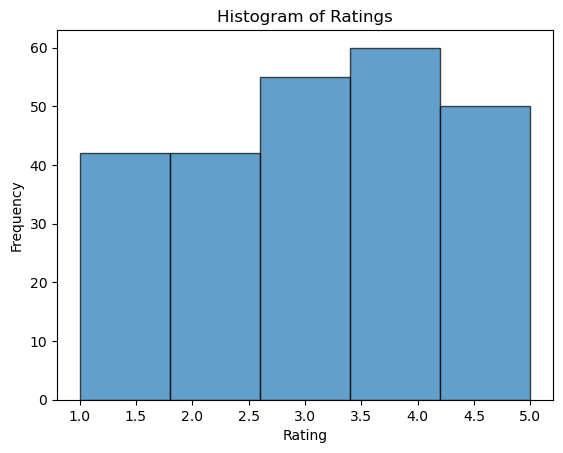

In [61]:
# Create a histogram
plt.hist(ratings, bins=5, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Show the plot
plt.show()

# PCA

In [62]:
average_face = np.mean(data_matrix, axis=0)
column_vector = average_face.reshape(1, 40000)

In [63]:
print(column_vector.shape)

(1, 40000)


In [64]:
data_matrix_normalized = data_matrix - column_vector

In [73]:
data_transposed = data_matrix_normalized.T

In [77]:
data_matrix_normalized.shape

(249, 40000)

In [105]:
print("Computing PCA")
pca = PCA(n_components=149)
pca.fit(data_matrix_normalized)

Computing PCA


PCA(n_components=149)

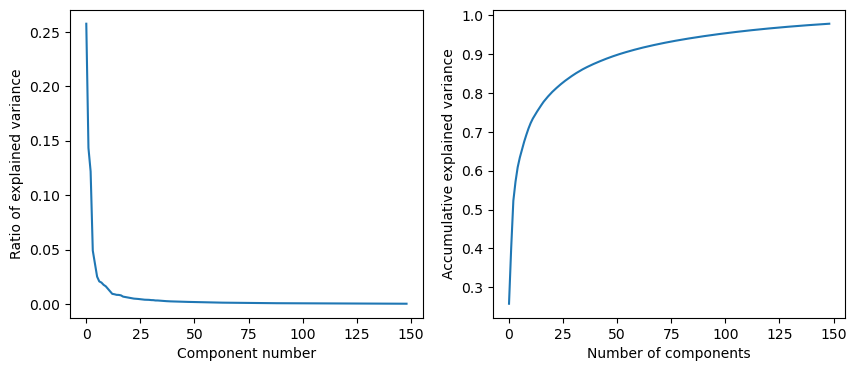

In [106]:
explained_variance = pca.explained_variance_ratio_
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(explained_variance)
ax[0].set_ylabel("Ratio of explained variance")
ax[0].set_xlabel("Component number")
ax[1].plot(explained_variance.cumsum())
ax[1].set_ylabel("Accumulative explained variance")
ax[1].set_xlabel("Number of components")
plt.show()

In [107]:
print("The first component explains {:.2f}% of the variance".format(explained_variance[0] * 100))

The first component explains 25.74% of the variance


In [108]:
np.sum(explained_variance*100>=1)

12

So, I take 12 components.

In [109]:
components = pca.transform(data_matrix_normalized)

In [110]:
components.shape

(249, 149)

In [111]:
PCA1 = components[:, 0]
PCA2 = components[:, 2]
PCA3 = components[:, 3]

## PCA1

In [115]:
mean_value = np.mean(PCA1)
closest_index = (np.abs(PCA1 - mean_value)).argmin()
closest_index

90

In [118]:
# Paths to the images
image_paths = [
    result[np.argmin(PCA1)],
    result[closest_index],
    result[np.argmax(PCA1)]
]

# Load the images
images = [Image.open(path) for path in image_paths]

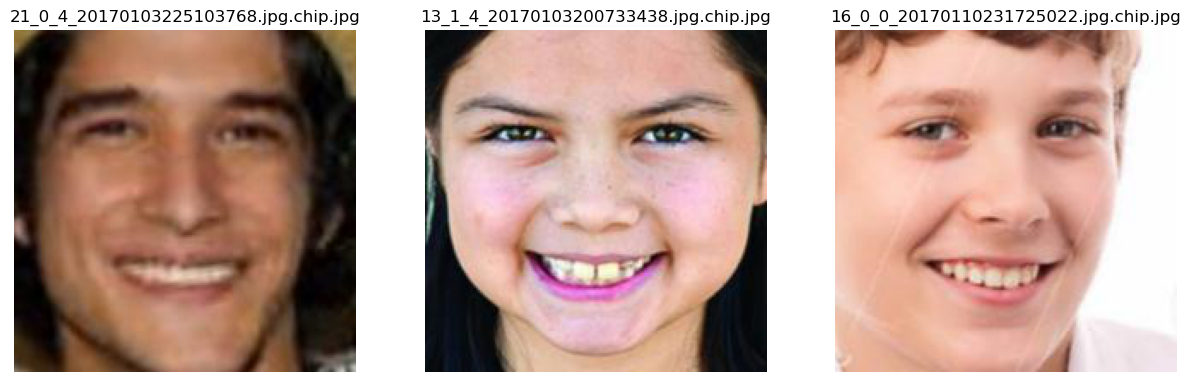

In [119]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display each image in a subplot
for ax, img, path in zip(axes, images, image_paths):
    ax.imshow(img)
    ax.set_title(path.split('\\')[-1])  # Set title to the image filename
    ax.axis('off')  # Hide the axes

# Show the plot
plt.show()

## PCA2

In [120]:
mean_value = np.mean(PCA2)
closest_index = (np.abs(PCA2 - mean_value)).argmin()
closest_index

181

In [121]:
# Paths to the images
image_paths = [
    result[np.argmin(PCA2)],
    result[closest_index],
    result[np.argmax(PCA2)]
]

# Load the images
images = [Image.open(path) for path in image_paths]

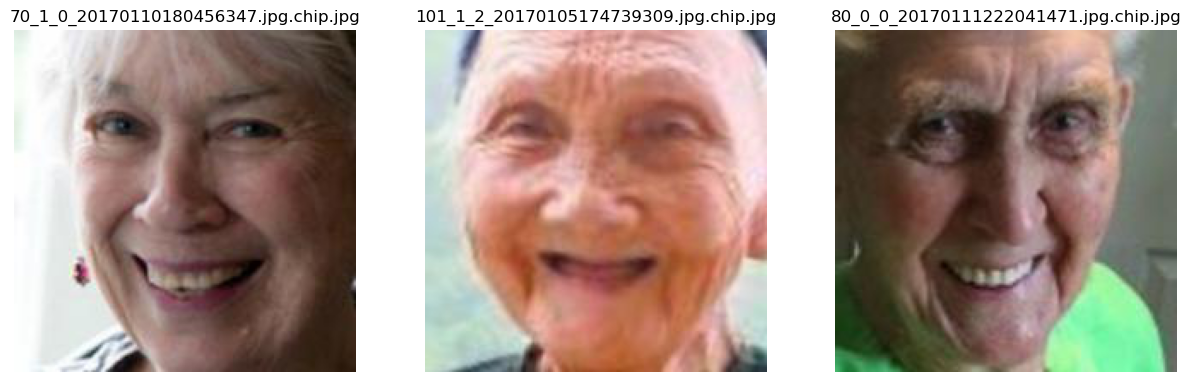

In [122]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display each image in a subplot
for ax, img, path in zip(axes, images, image_paths):
    ax.imshow(img)
    ax.set_title(path.split('\\')[-1])  # Set title to the image filename
    ax.axis('off')  # Hide the axes

# Show the plot
plt.show()

## PCA3

In [123]:
mean_value = np.mean(PCA3)
closest_index = (np.abs(PCA3 - mean_value)).argmin()
closest_index

132

In [124]:
# Paths to the images
image_paths = [
    result[np.argmin(PCA3)],
    result[closest_index],
    result[np.argmax(PCA3)]
]

# Load the images
images = [Image.open(path) for path in image_paths]

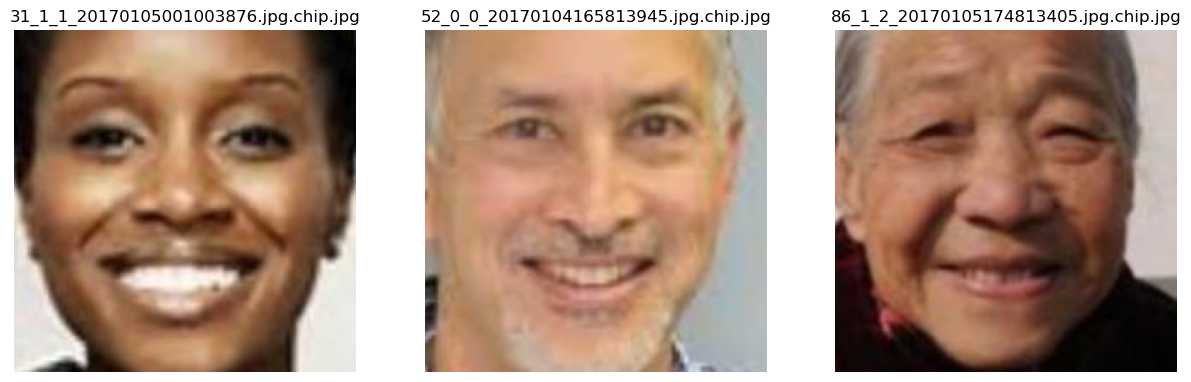

In [125]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display each image in a subplot
for ax, img, path in zip(axes, images, image_paths):
    ax.imshow(img)
    ax.set_title(path.split('\\')[-1])  # Set title to the image filename
    ax.axis('off')  # Hide the axes

# Show the plot
plt.show()

# Linear model

In [126]:
selected_pca = components[:, :12]

In [130]:
len(ratings)

249

In [131]:
selected_pca.shape

(249, 12)

In [133]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Example data (replace with your actual data)
# selected_pca: PCA scores matrix (shape: [n_samples, n_pcs])
# ratings: Normalized ratings vector (shape: [n_samples,])

# Dummy data for illustration
# selected_pca = np.random.rand(100, 10)  # 100 samples, 10 PCs
# ratings = np.random.rand(100,)  # 100 ratings

# Normalize ratings if not already normalized
# If ratings are already normalized, skip this step
scaler = StandardScaler()
ratings_normalized = scaler.fit_transform(np.array(ratings).reshape(-1, 1)).flatten()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_pca, ratings_normalized, test_size=0.2, random_state=42)


In [134]:
# Initialize Linear Regression model
model = LinearRegression()

# Set up Sequential Feature Selector for forward selection
selector = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward', cv=5)

# Fit the selector on the training data
selector.fit(X_train, y_train)

# Get the selected features
selected_features = selector.get_support()

print("Selected Features:", selected_features)

# Transform training and test data to include only selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]


Selected Features: [ True  True False  True False False  True  True False False  True False]


In [135]:
# Train the model with selected features
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.7490257699030909
R^2 Score: 0.3089167351171981


In [137]:
selected_pca_forward = selected_pca[:, selected_features]

In [138]:
# Transform training and test data to include only selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Get the coefficients of the model
coefficients = model.coef_

print("Model Coefficients for Selected PCs:", coefficients)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Model Coefficients for Selected PCs: [ 0.01075921  0.01849145  0.03122022 -0.02459235  0.05979563 -0.03291314]
Mean Squared Error: 0.7490257699030909
R^2 Score: 0.3089167351171981
